In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import metrics

import os
# need to find out why OMPerror occurs
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test/255.0

In [4]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(type(y_train.shape))
print(type((1)))

<class 'tuple'>
<class 'int'>


In [6]:
(1,) == (1,1)

False

1개의 element로 이루어진 tuple --> (n,) 이런 식으로!

In [7]:
x_train[0, :, :]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
y_train[0]

5

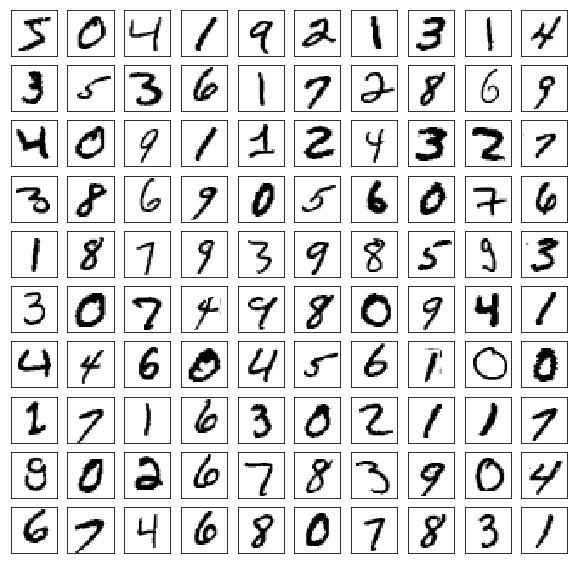

In [9]:
# subplotting 더 알아보긔~
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = plt.cm.binary)
plt.show()

In [10]:
img_rows = 28
img_cols = 28

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [11]:
# optimizer 먼저 지정(lr 지정 가능)
optimizer = tf.keras.optimizers.Adam
model.compile(optimizer=optimizer(lr=0.001), loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy])

In [12]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [13]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [14]:
y_train = tf.keras.utils.to_categorical(y_train)
# history = model.fit(x_train, y_train,validation_split=0.1, batch_size=128, epochs=20)

# 이 예제에서는 test_set을 따로 사용하는 것이 아니므로 기존에 x_test/y_test를  x_val/y_val 로 만든 후, validation_data로 만들어준다.
from tensorflow.keras.utils import to_categorical
(x_val, y_val) = (x_test, y_test)
y_val = to_categorical(y_val)
history = model.fit(x_train, y_train,validation_data=(x_val, y_val), batch_size=128, epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 75us/step - loss: 0.3383 - categorical_accuracy: 0.9035 - val_loss: 0.1601 - val_categorical_accuracy: 0.9547
Epoch 2/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.1509 - categorical_accuracy: 0.9559 - val_loss: 0.1147 - val_categorical_accuracy: 0.9655
Epoch 3/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.1092 - categorical_accuracy: 0.9680 - val_loss: 0.0916 - val_categorical_accuracy: 0.9728
Epoch 4/15
60000/60000 [==============================] - 4s 61us/step - loss: 0.0846 - categorical_accuracy: 0.9747 - val_loss: 0.0769 - val_categorical_accuracy: 0.9769
Epoch 5/15
60000/60000 [==============================] - 4s 67us/step - loss: 0.0695 - categorical_accuracy: 0.9797 - val_loss: 0.0721 - val_categorical_accuracy: 0.9773
Epoch 6/15
60000/60000 [==============================] - 4s 63us/step - loss: 0.0583 - categor

In [15]:
print(type(history.history))
history.history.keys()

<class 'dict'>


dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])

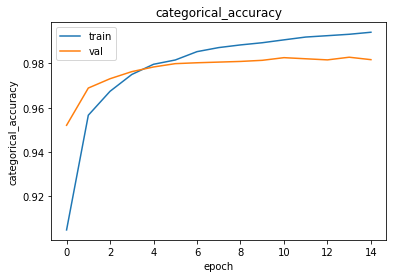

In [16]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('categorical_accuracy')
plt.ylabel('categorical_accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

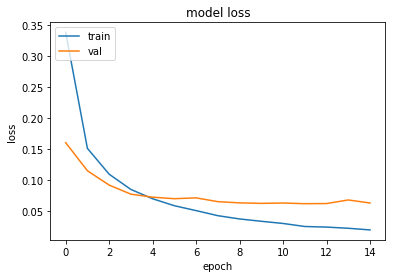

In [17]:
# plot train_loss & val_loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [18]:
# saving the model

# path = "./mnist_ann_model.hdf5"
# model.save_weights(path)

In [17]:
from IPython.display import HTML

In [18]:
input_form = """

<table>

<td style="border-style: none;">

<div style="border: solid 2px #666; width: 143px; height: 144px;">

<canvas width="140" height="140"></canvas>

</div></td>

<td style="border-style: none;">

<button onclick="clear_value()">Clear</button>

</td>

</table>

"""



javascript = """

<script type="text/Javascript">

    var pixels = [];

    for (var i = 0; i < 28*28; i++) pixels[i] = 0

    var click = 0;



    var canvas = document.querySelector("canvas");

    canvas.addEventListener("mousemove", function(e){

        if (e.buttons == 1) {

            click = 1;

            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";

            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);

            x = Math.floor(e.offsetY * 0.2)

            y = Math.floor(e.offsetX * 0.2) + 1

            for (var dy = 0; dy < 2; dy++){

                for (var dx = 0; dx < 2; dx++){

                    if ((x + dx < 28) && (y + dy < 28)){

                        pixels[(y+dy)+(x+dx)*28] = 1

                    }

                }

            }

        } else {

            if (click == 1) set_value()

            click = 0;

        }

    });

    

    function set_value(){

        var result = ""

        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","

        var kernel = IPython.notebook.kernel;

        kernel.execute("image = [" + result + "]");

    }

    

    function clear_value(){

        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";

        canvas.getContext("2d").fillRect(0, 0, 140, 140);

        for (var i = 0; i < 28*28; i++) pixels[i] = 0

    }

</script>

"""

In [19]:
HTML(input_form + javascript)

<BarContainer object of 10 artists>

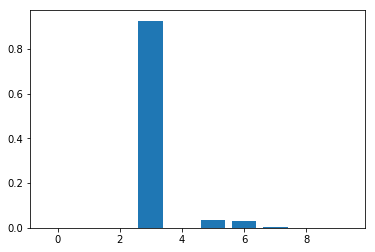

In [20]:
image_3darray = np.array(image).reshape([1,img_rows,img_cols]) # 1 for None(batch_size)
result = model.predict(image_3darray)
plt.bar(list(range(10)), list(result.reshape([10])))

In [21]:
print(result)
result.shape

[[6.5219567e-05 1.2705586e-04 1.9087027e-04 9.2539370e-01 7.4151222e-04
  3.7048988e-02 3.1063566e-02 5.2336175e-03 1.3072825e-04 4.7076373e-06]]


(1, 10)